<a href="https://colab.research.google.com/github/NDDV/House-Price-predict/blob/main/Career_HousePrice_Update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

#ApartmentTrading data

In [ ]:
#ƒê·ªçc d·ªØ li·ªáu
at_data = pd.read_csv("/content/drive/MyDrive/Data DA/ApartmentTrading.csv", encoding='utf8').iloc[:, 1:]
at_data.head(5)

dien_tich huong_ban_cong  phong_ngu              id_thanh_pho  \
0       75.0            NaN        2.0  5e5501caeb80a7245175dddb   
1      115.0       ƒê√¥ng Nam        3.0  5e5501caeb80a7245175dddb   
2      100.0            NaN        2.0  5e5501caeb80a7245175dddb   
3       30.0            NaN        2.0  5e5501caeb80a7245175dddb   
4       72.0            NaN        2.0  5e5501caeb80a7245175dddb   

      ten_thanh_pho                   id_quan      ten_quan  so_tang  \
0  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a  Qu·∫≠n Ba ƒê√¨nh      NaN   
1  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a  Qu·∫≠n Ba ƒê√¨nh      NaN   
2  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a  Qu·∫≠n Ba ƒê√¨nh      1.0   
3  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a  Qu·∫≠n Ba ƒê√¨nh      2.0   
4  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a  Qu·∫≠n Ba ƒê√¨nh      3.0   

   mat_tien noi_that  ...      gia      gia_m2  du_an  project_name  \
0       NaN      NaN  ...   6300.0   84.000000    NaN           NaN   
1       NaN      NaN  ...  10250.0   89.130435    NaN           NaN   
2       NaN      NaN  ...   2600.0   26.000000    NaN           NaN   
3       NaN      NaN  ...   3500.0  116.666667    NaN           NaN   
4       NaN      NaN  ...   1750.0   24.305556    NaN           NaN   

                   id_duong           ten_duong do_rong_duong  \
0  5e958ee8208d0d6d7648f9d1      Ph·ªë Ng·ªçc Kh√°nh           NaN   
1  5e958ee8208d0d6d7648f9d1      Ph·ªë Ng·ªçc Kh√°nh           NaN   
2  5e958ee8208d0d6d7648f9da  Ph·ªë Th√†nh C√¥ng B·∫Øc           NaN   
3                       NaN                 NaN           NaN   
4  5e958ee8208d0d6d7648f9bf       Ph·ªë ƒê·∫∑ng Dung           NaN   

  do_rong_duong_ml                 id_phuong         ten_phuong  
0              NaN  5e5501cbeb80a7245175e0eb  Ph∆∞·ªùng Ng·ªçc Kh√°nh  
1              NaN  5e5501cbeb80a7245175e0eb  Ph∆∞·ªùng Ng·ªçc Kh√°nh  
2              NaN  5e5501cbeb80a7245175e0ee  Ph∆∞·ªùng Th√†nh C√¥ng  
3              NaN                       NaN                NaN  
4              NaN  5e5501cbeb80a7245175e0e7  Ph∆∞·ªùng Qu√°n Th√°nh  

[5 rows x 24 columns]

In [ ]:
#ƒê·ªçc th√¥ng tin d·ªØ li·ªáu
at_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37259 entries, 0 to 37258
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dien_tich         36303 non-null  float64
 1   huong_ban_cong    12510 non-null  object 
 2   phong_ngu         26873 non-null  float64
 3   id_thanh_pho      37259 non-null  object 
 4   ten_thanh_pho     37259 non-null  object 
 5   id_quan           37259 non-null  object 
 6   ten_quan          37259 non-null  object 
 7   so_tang           2390 non-null   float64
 8   mat_tien          336 non-null    float64
 9   noi_that          14294 non-null  object 
 10  huong_nha         15144 non-null  object 
 11  so_do             16172 non-null  object 
 12  lat               37217 non-null  float64
 13  long              37217 non-null  float64
 14  gia               32136 non-null  float64
 15  gia_m2            32090 non-null  float64
 16  du_an             8557 non-null   object

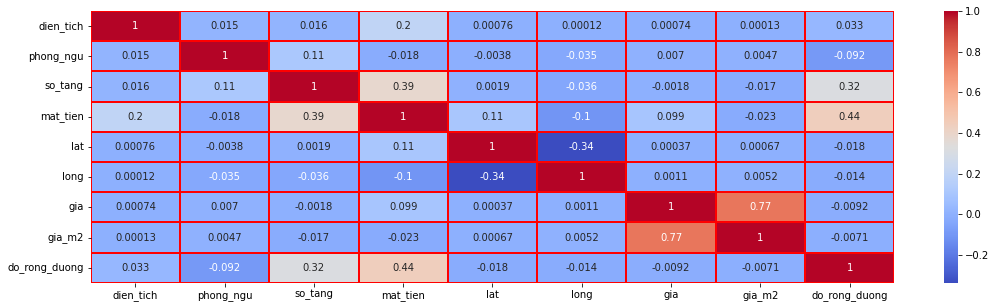

In [ ]:
plt.figure(figsize=(18,5))
sns.heatmap(at_data.corr(), annot=True, lw = 1, linecolor="r",cmap="coolwarm")

In [ ]:
print("Tr∆∞·ªõc: ",at_data.ten_quan.unique())
at_data["ten_quan"].replace({"Ba ƒê√¨nh": "Qu·∫≠n Ba ƒê√¨nh", 
                       "H√† ƒê√¥ng": "Qu·∫≠n H√† ƒê√¥ng", 
                       "ƒêan Ph∆∞·ª£ng": "Huy·ªán ƒêan Ph∆∞·ª£ng", 
                       "Ho√†i ƒê·ª©c": "Qu·∫≠n Ho√†i ƒê·ª©c", 
                       "Ba V√¨": "Huy·ªán Ba V√¨", 
                       'T√¢y H·ªì': 'Qu·∫≠n T√¢y H·ªì', 
                       "Long Bi√™n": "Qu·∫≠n Long Bi√™n", 
                       "C·∫ßu Gi·∫•y": "Qu·∫≠n C·∫ßu Gi·∫•y", 
                       "ƒê·ªëng ƒêa": "Qu·∫≠n ƒê·ªëng ƒêa", 
                       "Hai B√† Tr∆∞ng": "Qu·∫≠n Hai B√† Tr∆∞ng", 
                       "Ho√†ng Mai": "Qu·∫≠n Ho√†ng Mai", 
                       "Thanh Xu√¢n": "Qu·∫≠n Thanh Xu√¢n", 
                       'ƒê√¥ng Anh' : 'Huy·ªán ƒê√¥ng Anh', 
                       'Gia L√¢m' : 'Huy·ªán Gia L√¢m', 
                       'Thanh Tr√¨' : 'Huy·ªán Thanh Tr√¨',
                       "Nam T·ª´ Li√™m": "Qu·∫≠n Nam T·ª´ Li√™m",
                       "B·∫Øc T·ª´ Li√™m": "Qu·∫≠n B·∫Øc T·ª´ Li√™m",}
                      , inplace=True)
print("Sau: ",at_data.ten_quan.unique())

Tr∆∞·ªõc:  ['Qu·∫≠n Ba ƒê√¨nh' 'Ba ƒê√¨nh' 'Qu·∫≠n H√† ƒê√¥ng' 'H√† ƒê√¥ng' 'Ba V√¨'
 'Huy·ªán ƒêan Ph∆∞·ª£ng' 'ƒêan Ph∆∞·ª£ng' 'Huy·ªán Ho√†i ƒê·ª©c' 'Ho√†i ƒê·ª©c'
 'Huy·ªán Qu·ªëc Oai' 'Huy·ªán Th·∫°ch Th·∫•t' 'Huy·ªán Ch∆∞∆°ng M·ªπ' 'Huy·ªán Thanh Oai'
 'Huy·ªán Th∆∞·ªùng T√≠n' 'Qu·∫≠n Ho√†n Ki·∫øm' 'Qu·∫≠n T√¢y H·ªì' 'T√¢y H·ªì'
 'Qu·∫≠n Long Bi√™n' 'Long Bi√™n' 'Qu·∫≠n C·∫ßu Gi·∫•y' 'C·∫ßu Gi·∫•y' 'Qu·∫≠n ƒê·ªëng ƒêa'
 'ƒê·ªëng ƒêa' 'Qu·∫≠n Hai B√† Tr∆∞ng' 'Hai B√† Tr∆∞ng' 'Qu·∫≠n Ho√†ng Mai' 'Ho√†ng Mai'
 'Qu·∫≠n Thanh Xu√¢n' 'Thanh Xu√¢n' 'Huy·ªán S√≥c S∆°n' 'Huy·ªán ƒê√¥ng Anh'
 'ƒê√¥ng Anh' 'Huy·ªán Gia L√¢m' 'Gia L√¢m' 'Qu·∫≠n Nam T·ª´ Li√™m' 'Nam T·ª´ Li√™m'
 'Huy·ªán Thanh Tr√¨' 'Thanh Tr√¨' 'Qu·∫≠n B·∫Øc T·ª´ Li√™m' 'B·∫Øc T·ª´ Li√™m'
 'Huy·ªán M√™ Linh' 'Huy·ªán Ph√∫ Xuy√™n']
Sau:  ['Qu·∫≠n Ba ƒê√¨nh' 'Qu·∫≠n H√† ƒê√¥ng' 'Huy·ªán Ba V√¨' 'Huy·ªán ƒêan Ph∆∞·ª£ng'
 'Huy·ªán Ho√†i ƒê·ª©c' 'Qu·∫≠n Ho√†i ƒê·ª©c' 'Huy·ªán Qu·ªëc Oai' 'Huy·ªán Th·∫°ch Th·∫•t'
 'Huy·ªán Ch∆∞∆°ng

In [ ]:
print("Tr∆∞·ªõc: ",at_data.huong_nha.unique())
at_data["huong_nha"].replace({"T√¢y-B·∫Øc": "T√¢y B·∫Øc", 
                       "ƒê√¥ng-Nam": "ƒê√¥ng nam", 
                       "ƒê√¥ng-B·∫Øc": "ƒê√¥ng B·∫Øc", 
                       "T√¢y-Nam": "T√¢y Nam",}
                      , inplace=True)
print("Sau: ",at_data.huong_nha.unique())

Tr∆∞·ªõc:  [nan 'T√¢y B·∫Øc' 'Nam' 'ƒê√¥ng' 'ƒê√¥ng Nam' 'T√¢y' 'B·∫Øc' 'T√¢y-B·∫Øc' 'KXƒê'
 'ƒê√¥ng-Nam' 'ƒê√¥ng-B·∫Øc' 'T√¢y-Nam' 'ƒê√¥ng B·∫Øc' 'T√¢y Nam' 'ƒê√¥ng nam']
Sau:  [nan 'T√¢y B·∫Øc' 'Nam' 'ƒê√¥ng' 'ƒê√¥ng Nam' 'T√¢y' 'B·∫Øc' 'KXƒê' 'ƒê√¥ng nam'
 'ƒê√¥ng B·∫Øc' 'T√¢y Nam']


In [ ]:
#ƒê·ªïi c√°c gi√° tr·ªã nan th√†nh gi√° tr·ªã c√≥ th·ªÉ cho m√°y h·ªçc
def replaceNAN(df, ten_cot, gia_tri):
  if df[ten_cot].isna().sum() != 0:
    print("C·ªôt '",ten_cot,"' ƒë√£ chuy·ªÉn ƒë·ªïi",df[ten_cot].isna().sum(),"gi√° tr·ªã nan th√†nh:",gia_tri)
    df_doi = df.loc[:,(ten_cot)]
    df_doi = df_doi.fillna(gia_tri, inplace=True)
  else:
    print("C·ªôt '",ten_cot,"' kh√¥ng c√≥ gi√° tr·ªã nan")

def removeNAN(df, ten_cot):
  if df[ten_cot].isna().sum() != 0:
    print("C·ªôt '",ten_cot,"' ƒë√£ x√≥a gi√° tr·ªã nan")
    df.dropna(subset = [ten_cot],inplace = True)
  else:
    print("C·ªôt '",ten_cot,"' kh√¥ng c√≥ gi√° tr·ªã nan")

In [ ]:
replaceNAN(at_data, 'so_do', 'kh√¥ng')

C·ªôt ' so_do ' ƒë√£ chuy·ªÉn ƒë·ªïi 21087 gi√° tr·ªã nan th√†nh: kh√¥ng


In [ ]:
for i in at_data['so_do'].unique():
  if i != "kh√¥ng":
    at_data["so_do"].replace({i: "c√≥"}, inplace=True)
    print("Chuy·ªÉn ",i," Th√†nh c√¥ng")

Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß  Th√†nh c√¥ng
Chuy·ªÉn  ƒê√£ c√≥ s·ªï  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï h·ªìng/ S·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï h·ªìng  Th√†nh c√¥ng
Chuy·ªÉn  Ph√°p l√Ω r√µ r√†ng, s·ªü h·ªØu 50 nƒÉm r·ªìi CƒêT gia h·∫°n ti·∫øp cho kh√°ch h√†ng  Th√†nh c√¥ng
Chuy·ªÉn  ƒê√£ c√≥ s·ªï ƒë·ªè.  Th√†nh c√¥ng
Chuy·ªÉn  C√≥ s·ªï  Th√†nh c√¥ng
Chuy·ªÉn  S·ªü h·ªØu 50 nƒÉm, ph√°p l√Ω r√µ r√†ng.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè.  Th√†nh c√¥ng
Chuy·ªÉn  ƒê√£ c√≥ s·ªï ƒë·ªè ch√≠nh ch·ªß.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß.  Th√†nh c√¥ng
Chuy·ªÉn  Gi·∫•y t·ªù h·ª£p l·ªá  Th√†nh c√¥ng
Chuy·ªÉn  CƒÉn h·ªô ƒë√£ c√≥ s·ªï dfor.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ƒë·∫πp nh∆∞ hoa h·∫≠u, ch·ªù giao d·ªãch.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè s·ªü h·ªØu l√¢u d√†i vƒ©nh vi·ªÖn.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè s·ªü h·ªØu 50 nƒÉm.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªü h·ªØu vƒ©nh vi·ªÖn, ph√°p l√Ω r√µ r√†ng  Th√†nh c√¥ng
Chuy·ªÉn  S·ªü h·ªØu 50 nƒÉm

In [ ]:
at_data["so_do"].unique()

array(['c√≥', 'kh√¥ng'], dtype=object)

In [ ]:
#D·ªØ li·ªáu ƒë·ªÉ d·ª± ƒëo√°n gi√° nh√†
at_data_new = at_data[['dien_tich','phong_ngu','so_tang','so_do','lat','long','ten_quan','huong_nha','gia']]

In [ ]:
#Lo·∫°i b·ªè gi√° tr·ªã nan c√≥ trong gi√° nh√† ƒë·ªÉ d·ª± ƒëo√°n ch√≠nh x√°c h∆°n
at_data_new.dropna(subset = ["gia"],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
#Ki·ªÉm tra t·ªïng gi√° tr·ªã nan c√≥ trong d·ªØ li·ªáu
at_data_new.isna().sum()

dien_tich      476
phong_ngu     7901
so_tang      29787
so_do            0
lat             36
long            36
ten_quan         0
huong_nha    18498
gia              0
dtype: int64

In [ ]:
removeNAN(at_data_new, 'dien_tich')
removeNAN(at_data_new, 'lat')
removeNAN(at_data_new, 'long')

replaceNAN(at_data_new, 'phong_ngu',1)
replaceNAN(at_data_new, 'so_tang',1)
replaceNAN(at_data_new, 'huong_nha','KXƒê')

C·ªôt ' dien_tich ' ƒë√£ x√≥a gi√° tr·ªã nan
C·ªôt ' lat ' ƒë√£ x√≥a gi√° tr·ªã nan
C·ªôt ' long ' kh√¥ng c√≥ gi√° tr·ªã nan
C·ªôt ' phong_ngu ' ƒë√£ chuy·ªÉn ƒë·ªïi 7670 gi√° tr·ªã nan th√†nh: 1
C·ªôt ' so_tang ' ƒë√£ chuy·ªÉn ƒë·ªïi 29282 gi√° tr·ªã nan th√†nh: 1
C·ªôt ' huong_nha ' ƒë√£ chuy·ªÉn ƒë·ªïi 18142 gi√° tr·ªã nan th√†nh: KXƒê


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
print(at_data_new.isna().sum())
at_data_new.reset_index(drop=True, inplace=True)
print("Hi·ªán c√≥:",at_data_new.shape[0],"d√≤ng")

dien_tich    0
phong_ngu    0
so_tang      0
so_do        0
lat          0
long         0
ten_quan     0
huong_nha    0
gia          0
dtype: int64
Hi·ªán c√≥: 31624 d√≤ng


In [ ]:
#D√πng IQR ƒë·ªÉ x·ª≠ l√Ω ngo·∫°i lai
def outliner_remove(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  df_new = df
  df_new['outlier'] = ~((df_new[col] < (Q1 - 1.5*IQR)) | (df_new[col] > (Q3 + 1.5*IQR)))
  df_new = df_new[df_new['outlier'] == True]
  df_new = df_new.drop(columns=['outlier'])
  return df_new

In [ ]:
at_data_new.columns

Index(['dien_tich', 'phong_ngu', 'so_tang', 'so_do', 'lat', 'long', 'ten_quan',
       'huong_nha', 'gia'],
      dtype='object')

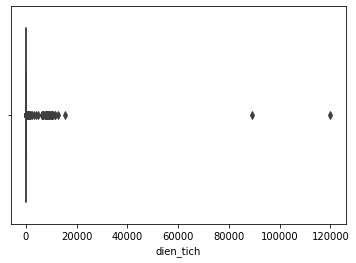

In [ ]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
plt.rcParams["figure.figsize"] = (6,4)
sns.boxplot(x=at_data_new['dien_tich'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


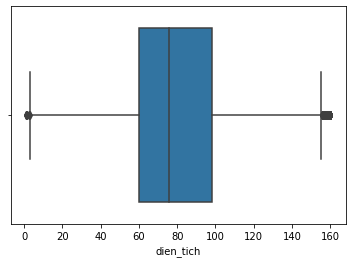

In [ ]:
at_data_new = outliner_remove(at_data_new, 'dien_tich')
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['dien_tich'])

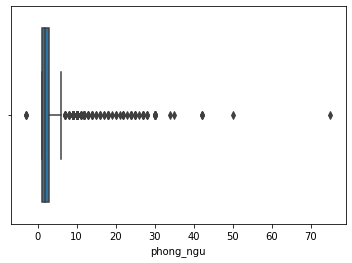

In [ ]:
sns.boxplot(x=at_data_new['phong_ngu'])

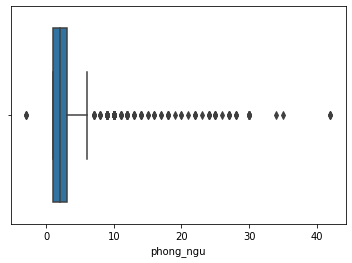

In [ ]:
at_data_new = at_data_new[at_data_new['phong_ngu'] <50]
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['phong_ngu'])

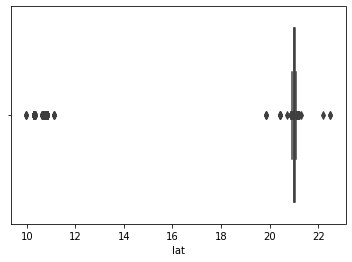

In [ ]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
sns.boxplot(x=at_data_new['lat']) 

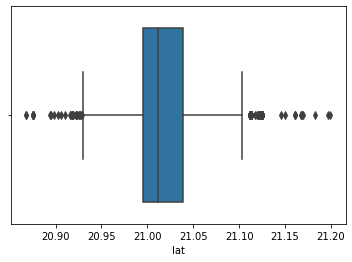

In [ ]:
at_data_new = at_data_new[at_data_new['lat'] <21.2]
at_data_new = at_data_new[at_data_new['lat'] >20.8]
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['lat']) 

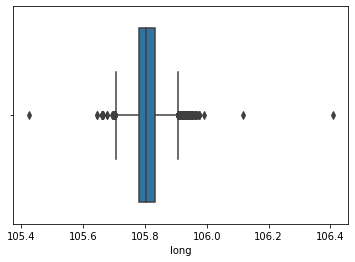

In [ ]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
sns.boxplot(x=at_data_new['long'])

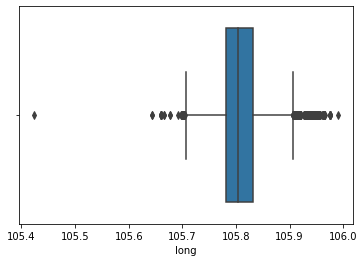

In [ ]:
at_data_new = at_data_new[at_data_new['long'] <106.1]
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['long'])

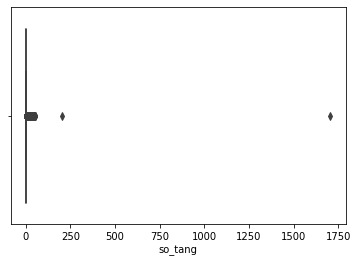

In [ ]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
sns.boxplot(x=at_data_new['so_tang'])

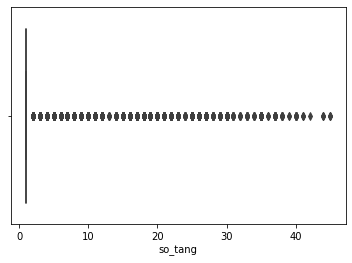

In [ ]:
at_data_new = at_data_new[at_data_new['so_tang'] <50]
at_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=at_data_new['so_tang'])

In [ ]:
at_data_new['the_loai'] = 'Apartment'

In [ ]:
at_data_new

dien_tich  phong_ngu  so_tang  so_do        lat        long  \
0           75.0        2.0      1.0     c√≥  21.031035  105.815152   
1          115.0        3.0      1.0     c√≥  21.031130  105.814818   
2          100.0        2.0      1.0     c√≥  21.020889  105.815820   
3           30.0        2.0      2.0     c√≥  21.028785  105.821409   
4           72.0        2.0      3.0     c√≥  21.043654  105.841574   
...          ...        ...      ...    ...        ...         ...   
30353       35.0        1.0      1.0  kh√¥ng  21.071830  105.797201   
30354      122.0        4.0      1.0  kh√¥ng  21.040789  105.765044   
30355       72.0        2.0      1.0  kh√¥ng  21.047770  105.792404   
30356       54.0        2.0      1.0  kh√¥ng  21.168425  105.741163   
30357       48.0        4.0      5.0  kh√¥ng  21.196260  105.784695   

               ten_quan huong_nha        gia   the_loai  
0          Qu·∫≠n Ba ƒê√¨nh       KXƒê   6300.000  Apartment  
1          Qu·∫≠n Ba ƒê√¨nh   T√¢y B·∫Øc  10250.000  Apartment  
2          Qu·∫≠n Ba ƒê√¨nh       Nam   2600.000  Apartment  
3          Qu·∫≠n Ba ƒê√¨nh       KXƒê   3500.000  Apartment  
4          Qu·∫≠n Ba ƒê√¨nh      ƒê√¥ng   1750.000  Apartment  
...                 ...       ...        ...        ...  
30353  Qu·∫≠n B·∫Øc T·ª´ Li√™m       KXƒê    550.000  Apartment  
30354  Qu·∫≠n B·∫Øc T·ª´ Li√™m       KXƒê     11.000  Apartment  
30355  Qu·∫≠n B·∫Øc T·ª´ Li√™m       KXƒê      9.000  Apartment  
30356     Huy·ªán M√™ Linh       KXƒê    432.000  Apartment  
30357     Huy·ªán M√™ Linh       KXƒê      2.304  Apartment  

[30358 rows x 10 columns]

#LandTrading data

In [ ]:
lt_data = pd.read_csv("/content/drive/MyDrive/Data DA/LandTrading.csv", encoding='utf8').iloc[:, 1:]
lt_data

dien_tich huong_ban_cong  phong_ngu              id_thanh_pho  \
0          220.0            NaN        1.0  5e5501caeb80a7245175dddb   
1          500.0            NaN        NaN  5e5501caeb80a7245175dddb   
2          154.0            NaN        1.0  5e5501caeb80a7245175dddb   
3          116.0            NaN        NaN  5e5501caeb80a7245175dddb   
4          195.0            NaN        1.0  5e5501caeb80a7245175dddb   
...          ...            ...        ...                       ...   
27249       72.0            NaN        NaN  5e5501caeb80a7245175dddb   
27250       90.0            NaN        NaN  5e5501caeb80a7245175dddb   
27251      100.0            NaN        NaN  5e5501caeb80a7245175dddb   
27252      100.0            NaN        NaN  5e5501caeb80a7245175dddb   
27253       90.0            NaN        NaN  5e5501caeb80a7245175dddb   

          ten_thanh_pho                   id_quan         ten_quan  so_tang  \
0      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a     Qu·∫≠n Ba ƒê√¨nh      1.0   
1      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a     Qu·∫≠n Ba ƒê√¨nh      NaN   
2      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a     Qu·∫≠n Ba ƒê√¨nh      1.0   
3      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a     Qu·∫≠n Ba ƒê√¨nh      NaN   
4      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a     Qu·∫≠n Ba ƒê√¨nh      1.0   
...                 ...                       ...              ...      ...   
27249  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dedd  Huy·ªán Ph√∫ Xuy√™n      NaN   
27250  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dedd  Huy·ªán Ph√∫ Xuy√™n      NaN   
27251  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dedd  Huy·ªán Ph√∫ Xuy√™n      NaN   
27252  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dedd  Huy·ªán Ph√∫ Xuy√™n      NaN   
27253  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dedd  Huy·ªán Ph√∫ Xuy√™n      NaN   

       mat_tien noi_that  ...       gia      gia_m2  du_an  project_name  \
0           NaN      NaN  ...   30000.0  136.363636    NaN           NaN   
1           NaN      NaN  ...  195000.0  390.000000    NaN           NaN   
2           NaN      NaN  ...   40000.0  259.740260    NaN           NaN   
3           NaN      NaN  ...   14300.0  123.275862    NaN           NaN   
4           NaN      NaN  ...   26500.0  135.897436    NaN           NaN   
...         ...      ...  ...       ...         ...    ...           ...   
27249       NaN      NaN  ...     670.0    9.305556    NaN           NaN   
27250       NaN      NaN  ...     800.0    8.888889    NaN           NaN   
27251       8.0      NaN  ...       NaN         NaN    NaN           NaN   
27252       NaN      NaN  ...       NaN         NaN    NaN           NaN   
27253       NaN      NaN  ...    2150.0   23.888889    NaN           NaN   

                       id_duong             ten_duong do_rong_duong  \
0      5e958ee8208d0d6d7648f9cc         Ph·ªë Linh Lang          10.0   
1      5e958ee8208d0d6d7648f96d     ƒê∆∞·ªùng Cao B√° Qu√°t          40.0   
2      5e958ee8208d0d6d7648f978         ƒê∆∞·ªùng ƒê·ªôi C·∫•n          20.0   
3      5e958ee8208d0d6d7648f974         ƒê∆∞·ªùng ƒê√†o T·∫•n           8.0   
4      5e958ee8208d0d6d7648f97a  ƒê∆∞·ªùng Giang VƒÉn Minh         100.0   
...                         ...                   ...           ...   
27249                       NaN                   NaN           NaN   
27250  5e958eef208d0d6d76490f18      ƒê∆∞·ªùng Qu·ªëc l·ªô 1A           NaN   
27251  5e958eef208d0d6d76490f1c     ƒê∆∞·ªùng T·ªânh l·ªô 428           NaN   
27252                       NaN                   NaN           NaN   
27253  5e958eef208d0d6d76490f18      ƒê∆∞·ªùng Qu·ªëc l·ªô 1A           NaN   

         do_rong_duong_ml                 id_phuong          ten_phuong  
0        Ng√µ 4 √¥ t√¥ tr√°nh  5e5501cbeb80a7245175e0e4      Ph∆∞·ªùng C·ªëng V·ªã  
1      Ng√µ 4 √¥ t√¥ tr·ªü l√™n  5e5501cbeb80a7245175e0e9    Ph∆∞·ªùng ƒêi·ªán Bi√™n  
2      Ng√µ 4 √¥ t√¥ tr·ªü 

In [ ]:
print("Tr∆∞·ªõc: ",lt_data.ten_quan.unique())
at_data["ten_quan"].replace({"H√† ƒê√¥ng": "Qu·∫≠n H√† ƒê√¥ng",
                             'S∆°n T√¢y':'Th·ªã x√£ S∆°n T√¢y',
                             'ƒêan Ph∆∞·ª£ng':'Huy·ªán ƒêan Ph∆∞·ª£ng',
                             'Qu·ªëc Oai':'Huy·ªán Qu·ªëc Oai',
                             'Th·∫°ch Th·∫•t':'Huy·ªán Th·∫°ch Th·∫•t',
                             'Th∆∞·ªùng T√≠n':'Huy·ªán Th∆∞·ªùng T√≠n',
                             'T√¢y H·ªì':'Qu·∫≠n T√¢y H·ªì',
                             'Long Bi√™n':'Qu·∫≠n Long Bi√™n',
                             'ƒê·ªëng ƒêa':'Qu·∫≠n ƒê·ªëng ƒêa',
                             'Hai B√† Tr∆∞ng':'Qu·∫≠n Hai B√† Tr∆∞ng',
                             'Ho√†ng Mai':'Qu·∫≠n Ho√†ng Mai',
                             'Thanh Xu√¢n':'Qu·∫≠n Thanh Xu√¢n',
                             'S√≥c S∆°n':'Huy·ªán S√≥c S∆°n',
                             'Nam T·ª´ Li√™m':'Qu·∫≠n Nam T·ª´ Li√™m',
                             'Thanh Tr√¨':'Huy·ªán Thanh Tr√¨',
                             'B·∫Øc T·ª´ Li√™m':'Qu·∫≠n B·∫Øc T·ª´ Li√™m',
                             'Ph√∫ Xuy√™n':'Huy·ªán Ph√∫ Xuy√™n'}
                      , inplace=True)
print("Sau: ",at_data.ten_quan.unique())

Tr∆∞·ªõc:  ['Qu·∫≠n Ba ƒê√¨nh' 'Qu·∫≠n H√† ƒê√¥ng' 'H√† ƒê√¥ng' 'Th·ªã x√£ S∆°n T√¢y' 'S∆°n T√¢y'
 'Huy·ªán Ba V√¨' 'Huy·ªán Ph√∫c Th·ªç' 'Huy·ªán ƒêan Ph∆∞·ª£ng' 'ƒêan Ph∆∞·ª£ng'
 'Huy·ªán Ho√†i ƒê·ª©c' 'Huy·ªán Qu·ªëc Oai' 'Qu·ªëc Oai' 'Huy·ªán Th·∫°ch Th·∫•t'
 'Th·∫°ch Th·∫•t' 'Huy·ªán Ch∆∞∆°ng M·ªπ' 'Huy·ªán Thanh Oai' 'Huy·ªán Th∆∞·ªùng T√≠n'
 'Th∆∞·ªùng T√≠n' 'Qu·∫≠n Ho√†n Ki·∫øm' 'Huy·ªán ·ª®ng H√≤a' 'Huy·ªán M·ªπ ƒê·ª©c'
 'Qu·∫≠n T√¢y H·ªì' 'T√¢y H·ªì' 'Qu·∫≠n Long Bi√™n' 'Long Bi√™n' 'Qu·∫≠n C·∫ßu Gi·∫•y'
 'Qu·∫≠n ƒê·ªëng ƒêa' 'ƒê·ªëng ƒêa' 'Qu·∫≠n Hai B√† Tr∆∞ng' 'Hai B√† Tr∆∞ng' 'Ho√†ng Mai'
 'Qu·∫≠n Ho√†ng Mai' 'Qu·∫≠n Thanh Xu√¢n' 'Thanh Xu√¢n' 'Huy·ªán S√≥c S∆°n' 'S√≥c S∆°n'
 'Huy·ªán ƒê√¥ng Anh' 'Huy·ªán Gia L√¢m' 'Nam T·ª´ Li√™m' 'Qu·∫≠n Nam T·ª´ Li√™m'
 'Thanh Tr√¨' 'Huy·ªán Thanh Tr√¨' 'Qu·∫≠n B·∫Øc T·ª´ Li√™m' 'B·∫Øc T·ª´ Li√™m'
 'Huy·ªán M√™ Linh' 'Huy·ªán Ph√∫ Xuy√™n' 'Ph√∫ Xuy√™n']
Sau:  ['Qu·∫≠n Ba ƒê√¨nh' 'Qu·∫≠n H√† ƒê√¥ng' 'Huy·ªán Ba V√¨' 'Huy·ªán ƒêan Ph∆∞·ª

In [ ]:
print("Tr∆∞·ªõc: ",lt_data.huong_nha.unique())
lt_data["huong_nha"].replace({"T√¢y-B·∫Øc": "T√¢y B·∫Øc", 
                       "ƒê√¥ng-Nam": "ƒê√¥ng nam", 
                       "ƒê√¥ng-B·∫Øc": "ƒê√¥ng B·∫Øc", 
                       "T√¢y-Nam": "T√¢y Nam",}
                      , inplace=True)
print("Sau: ",lt_data.huong_nha.unique())

Tr∆∞·ªõc:  [nan 'ƒê√¥ng' 'ƒê√¥ng Nam' 'KXƒê' 'T√¢y' 'ƒê√¥ng B·∫Øc' 'T√¢y Nam' 'B·∫Øc' 'Nam'
 'T√¢y-B·∫Øc' 'ƒê√¥ng-B·∫Øc' 'T√¢y-Nam' 'ƒê√¥ng-Nam' 'T√¢y B·∫Øc' 'ƒê√¥ng nam']
Sau:  [nan 'ƒê√¥ng' 'ƒê√¥ng Nam' 'KXƒê' 'T√¢y' 'ƒê√¥ng B·∫Øc' 'T√¢y Nam' 'B·∫Øc' 'Nam'
 'T√¢y B·∫Øc' 'ƒê√¥ng nam']


In [ ]:
replaceNAN(lt_data, 'so_do', 'kh√¥ng')

C·ªôt ' so_do ' ƒë√£ chuy·ªÉn ƒë·ªïi 12566 gi√° tr·ªã nan th√†nh: kh√¥ng


In [ ]:
for i in lt_data['so_do'].unique():
  if i != "kh√¥ng":
    lt_data["so_do"].replace({i: "c√≥"}, inplace=True)
    print("Chuy·ªÉn ",i," Th√†nh c√¥ng")
lt_data["so_do"].unique()

Chuy·ªÉn  S·ªï h·ªìng/ S·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  Gi·∫•y t·ªù h·ª£p l·ªá  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï h·ªìng  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß.  Th√†nh c√¥ng
Chuy·ªÉn  C√≥ s·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  ƒê√£ c√≥ s·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  ƒê√£ c√≥ s·ªï  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè.  Th√†nh c√¥ng
Chuy·ªÉn  C√≥ s·ªï  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß, n·ªü h·∫≠u, s·∫µn s√†ng giao d·ªãch.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè vu√¥ng ƒë·∫πp s·∫µn s√†ng giao d·ªãch  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ch√≠nh ch·ªß vu√¥ng ƒë·∫πp  Th√†nh c√¥ng
Chuy·ªÉn  H·ªì s∆° ph√°p l√Ω ƒë·∫ßy ƒë·ªß.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß, ph√°p l√Ω s·∫°ch ƒë·∫πp.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß, ph√°p l√Ω chu·∫©n.  Th√†nh c√¥ng
Chuy·ªÉn  H·ªì s∆° vƒÉn t·ª±  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè s·∫µn s√†ng  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè, ph√°p l√Ω ƒë·∫ßy ƒë·ª

array(['c√≥', 'kh√¥ng'], dtype=object)

In [ ]:
#D·ªØ li·ªáu ƒë·ªÉ d·ª± ƒëo√°n gi√° nh√†
lt_data_new = lt_data[['dien_tich','phong_ngu','so_tang','so_do','lat','long','ten_quan','huong_nha','gia']]

In [ ]:
lt_data_new

dien_tich  phong_ngu  so_tang  so_do        lat        long  \
0          220.0        1.0      1.0     c√≥  21.035456  105.810210   
1          500.0        NaN      NaN     c√≥  21.030160  105.839556   
2          154.0        1.0      1.0     c√≥  21.034405  105.831625   
3          116.0        NaN      NaN     c√≥  21.032373  105.809571   
4          195.0        1.0      1.0     c√≥  21.029599  105.827306   
...          ...        ...      ...    ...        ...         ...   
27249       72.0        NaN      NaN     c√≥  20.775086  105.826094   
27250       90.0        NaN      NaN     c√≥  20.758092  105.912060   
27251      100.0        NaN      NaN  kh√¥ng  20.704557  105.845669   
27252      100.0        NaN      NaN     c√≥  20.716869  105.890686   
27253       90.0        NaN      NaN     c√≥  20.691606  105.911513   

              ten_quan huong_nha       gia  
0         Qu·∫≠n Ba ƒê√¨nh       NaN   30000.0  
1         Qu·∫≠n Ba ƒê√¨nh       NaN  195000.0  
2         Qu·∫≠n Ba ƒê√¨nh       NaN   40000.0  
3         Qu·∫≠n Ba ƒê√¨nh       NaN   14300.0  
4         Qu·∫≠n Ba ƒê√¨nh       NaN   26500.0  
...                ...       ...       ...  
27249  Huy·ªán Ph√∫ Xuy√™n       NaN     670.0  
27250  Huy·ªán Ph√∫ Xuy√™n       Nam     800.0  
27251  Huy·ªán Ph√∫ Xuy√™n       NaN       NaN  
27252  Huy·ªán Ph√∫ Xuy√™n       NaN       NaN  
27253  Huy·ªán Ph√∫ Xuy√™n  ƒê√¥ng Nam    2150.0  

[27254 rows x 9 columns]

In [ ]:
#Lo·∫°i b·ªè gi√° tr·ªã nan c√≥ trong gi√° nh√† ƒë·ªÉ d·ª± ƒëo√°n ch√≠nh x√°c h∆°n
lt_data_new.dropna(subset = ["gia"],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
lt_data_new.isna().sum()

dien_tich      103
phong_ngu    21920
so_tang      21715
so_do            0
lat             25
long            25
ten_quan         0
huong_nha    15821
gia              0
dtype: int64

In [ ]:
removeNAN(lt_data_new, 'dien_tich')
removeNAN(lt_data_new, 'lat')
removeNAN(lt_data_new, 'long')

replaceNAN(lt_data_new, 'phong_ngu',1)
replaceNAN(lt_data_new, 'so_tang',1)
replaceNAN(lt_data_new, 'huong_nha','KXƒê')
print(lt_data_new.isna().sum())
lt_data_new.reset_index(drop=True, inplace=True)
print("Hi·ªán c√≥:",lt_data_new.shape[0],"d√≤ng")

C·ªôt ' dien_tich ' ƒë√£ x√≥a gi√° tr·ªã nan
C·ªôt ' lat ' ƒë√£ x√≥a gi√° tr·ªã nan
C·ªôt ' long ' kh√¥ng c√≥ gi√° tr·ªã nan
C·ªôt ' phong_ngu ' ƒë√£ chuy·ªÉn ƒë·ªïi 21796 gi√° tr·ªã nan th√†nh: 1
C·ªôt ' so_tang ' ƒë√£ chuy·ªÉn ƒë·ªïi 21591 gi√° tr·ªã nan th√†nh: 1
C·ªôt ' huong_nha ' ƒë√£ chuy·ªÉn ƒë·ªïi 15718 gi√° tr·ªã nan th√†nh: KXƒê
dien_tich    0
phong_ngu    0
so_tang      0
so_do        0
lat          0
long         0
ten_quan     0
huong_nha    0
gia          0
dtype: int64
Hi·ªán c√≥: 22841 d√≤ng


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


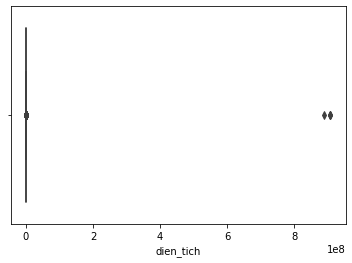

In [ ]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
sns.boxplot(x=lt_data_new['dien_tich'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


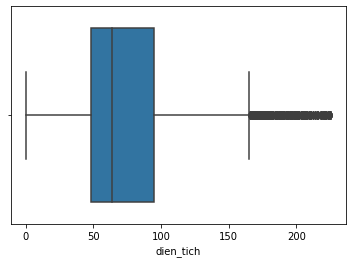

In [ ]:
lt_data_new = outliner_remove(lt_data_new, 'dien_tich')
lt_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=lt_data_new['dien_tich'])

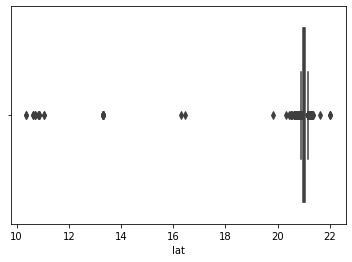

In [ ]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
sns.boxplot(x=lt_data_new['lat'])

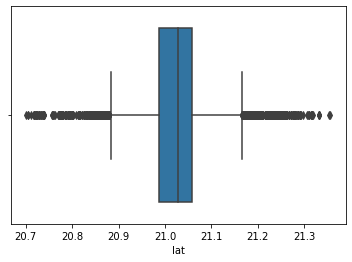

In [ ]:
lt_data_new = lt_data_new[lt_data_new['lat'] >20.7]
lt_data_new = lt_data_new[lt_data_new['lat'] <21.6]
lt_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=lt_data_new['lat'])

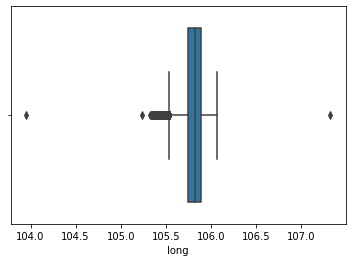

In [ ]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
sns.boxplot(x=lt_data_new['long'])

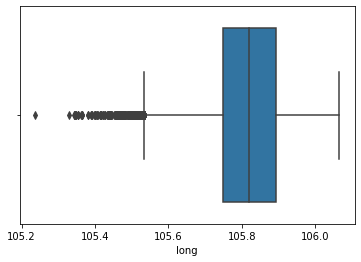

In [ ]:
lt_data_new = lt_data_new[lt_data_new['long'] >105]
lt_data_new = lt_data_new[lt_data_new['long'] <107]
lt_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=lt_data_new['long'])

In [ ]:
lt_data_new['the_loai'] = 'Land'

In [ ]:
lt_data_new

dien_tich  phong_ngu  so_tang so_do        lat        long  \
0          220.0        1.0      1.0    c√≥  21.035456  105.810210   
1          154.0        1.0      1.0    c√≥  21.034405  105.831625   
2          116.0        1.0      1.0    c√≥  21.032373  105.809571   
3          195.0        1.0      1.0    c√≥  21.029599  105.827306   
4          100.0        5.0      1.0    c√≥  21.031460  105.822657   
...          ...        ...      ...   ...        ...         ...   
19746       72.0        1.0      1.0    c√≥  20.775086  105.826094   
19747       72.0        1.0      1.0    c√≥  20.838600  105.808333   
19748      120.0        1.0      1.0    c√≥  20.768980  105.806281   
19749       72.0        1.0      1.0    c√≥  20.775086  105.826094   
19750       90.0        1.0      1.0    c√≥  20.758092  105.912060   

              ten_quan huong_nha           gia the_loai  
0         Qu·∫≠n Ba ƒê√¨nh       KXƒê  30000.000000     Land  
1         Qu·∫≠n Ba ƒê√¨nh       KXƒê  40000.000000     Land  
2         Qu·∫≠n Ba ƒê√¨nh       KXƒê  14300.000000     Land  
3         Qu·∫≠n Ba ƒê√¨nh       KXƒê  26500.000000     Land  
4         Qu·∫≠n Ba ƒê√¨nh       KXƒê   5400.000000     Land  
...                ...       ...           ...      ...  
19746  Huy·ªán Ph√∫ Xuy√™n       KXƒê      0.555555     Land  
19747  Huy·ªán Ph√∫ Xuy√™n       KXƒê    600.000000     Land  
19748  Huy·ªán Ph√∫ Xuy√™n       KXƒê    554.480000     Land  
19749  Huy·ªán Ph√∫ Xuy√™n       KXƒê    670.000000     Land  
19750  Huy·ªán Ph√∫ Xuy√™n       Nam    800.000000     Land  

[19751 rows x 10 columns]

#RoadSurfaceHouseTrading data

In [ ]:
rsht_data = pd.read_csv("/content/drive/MyDrive/Data DA/RoadSurfaceHouseTrading.csv", encoding='utf8').iloc[:, 1:]
rsht_data

dien_tich huong_ban_cong  phong_ngu              id_thanh_pho  \
0           42.0            NaN        2.0  5e5501caeb80a7245175dddb   
1          220.0            NaN        NaN  5e5501caeb80a7245175dddb   
2           69.0       ƒê√¥ng-Nam        9.0  5e5501caeb80a7245175dddb   
3           50.0            NaN        NaN  5e5501caeb80a7245175dddb   
4           72.0            NaN        5.0  5e5501caeb80a7245175dddb   
...          ...            ...        ...                       ...   
62842       80.0            NaN        3.0  5e5501caeb80a7245175dddb   
62843       80.0            NaN        3.0  5e5501caeb80a7245175dddb   
62844      105.0            NaN        6.0  5e5501caeb80a7245175dddb   
62845       70.0            NaN        1.0  5e5501caeb80a7245175dddb   
62846       70.0            NaN        2.0  5e5501caeb80a7245175dddb   

          ten_thanh_pho                   id_quan       ten_quan  so_tang  \
0      Th√†nh ph·ªë H√† N·ªôi                       NaN            NaN      3.0   
1      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a   Qu·∫≠n Ba ƒê√¨nh      NaN   
2      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a   Qu·∫≠n Ba ƒê√¨nh      7.0   
3      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a   Qu·∫≠n Ba ƒê√¨nh      5.0   
4      Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175de1a   Qu·∫≠n Ba ƒê√¨nh      5.0   
...                 ...                       ...            ...      ...   
62842  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dec6  Huy·ªán M√™ Linh      3.0   
62843  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dec6  Huy·ªán M√™ Linh      3.0   
62844  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dec6  Huy·ªán M√™ Linh      NaN   
62845  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dec6  Huy·ªán M√™ Linh      1.0   
62846  Th√†nh ph·ªë H√† N·ªôi  5e5501caeb80a7245175dec6  Huy·ªán M√™ Linh      1.0   

       mat_tien                                           noi_that  ...  \
0           NaN                                                NaN  ...   
1           NaN                                                NaN  ...   
2           8.3  Nh√† x√¢y ki√™n c·ªë, s∆°n nh√† tr·∫Øng Kova m·ªõi s∆°n l·∫°...  ...   
3           NaN                                                NaN  ...   
4           6.0                                                NaN  ...   
...         ...                                                ...  ...   
62842       NaN                                                NaN  ...   
62843       NaN                                                NaN  ...   
62844       5.0                                           Kh√¥ng NT  ...   
62845       NaN                                                NaN  ...   
62846       NaN                                                NaN  ...   

           gia      gia_m2  du_an  project_name                  id_duong  \
0       2250.0   53.571429    NaN           NaN                       NaN   
1      61000.0  277.272727    NaN           NaN                       NaN   
2      21000.0  304.347826    NaN           NaN  5e958ee8208d0d6d7648f98f   
3      25000.0  500.000000    NaN           NaN  5e958ee8208d0d6d7648f9ac   
4      12000.0  166.666667    NaN           NaN  5e958ee8208d0d6d7648f974   
...        ...         ...    ...           ...                       ...   
62842   4500.0   56.250000    NaN           NaN                       NaN   
62843   4950.0   61.875000    NaN           NaN  5e958eee208d0d6d76490ae8   
62844      NaN         NaN    NaN           NaN  5e958eee208d0d6d76490ae7   
62845   2400.0   34.285714    NaN           NaN  5e958eee208d0d6d76490aeb   
62846   4000.0   34.285714    NaN           NaN  5e958eee208d0d6d76490aeb   

                    ten_duong do_rong_duong     do_rong_duong_ml  \
0                         NaN           3.0  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng   
1                         NaN           NaN  M·∫∑t ph·ªë - M·∫∑t ƒë∆∞·ªùng   
2      ƒê∆∞·ªùng Nguy·ªÖn C√¥ng Hoan           NaN  M·∫∑t p

In [ ]:
print("Tr∆∞·ªõc: ",rsht_data.ten_quan.unique())
rsht_data["ten_quan"].replace({'Ba ƒê√¨nh': 'Qu·∫≠n Ba ƒê√¨nh',
                               'H√† ƒê√¥ng':'Qu·∫≠n H√† ƒê√¥ng',
                               'Th∆∞·ªùng T√≠n':'Huy·ªán Th∆∞·ªùng T√≠n',
                               'Ho√†n Ki·∫øm':'Qu·∫≠n Ho√†n Ki·∫øm',
                               'T√¢y H·ªì' :'Qu·∫≠n T√¢y H·ªì',
                               'Long Bi√™n':'Qu·∫≠n Long Bi√™n',
                               'C·∫ßu Gi·∫•y':'Qu·∫≠n C·∫ßu Gi·∫•y',
                               'ƒê·ªëng ƒêa':'Qu·∫≠n ƒê·ªëng ƒêa',
                               'Hai B√† Tr∆∞ng':'Qu·∫≠n Hai B√† Tr∆∞ng',
                               'Ho√†ng Mai' :'Qu·∫≠n Ho√†ng Mai',
                               'Thanh Xu√¢n':'Qu·∫≠n Thanh Xu√¢n',
                               'Nam T·ª´ Li√™m':'Qu·∫≠n Nam T·ª´ Li√™m',
                               'B·∫Øc T·ª´ Li√™m':'Qu·∫≠n B·∫Øc T·ª´ Li√™m'}
                      , inplace=True)
print("Sau: ",rsht_data.ten_quan.unique())

Tr∆∞·ªõc:  [nan 'Qu·∫≠n Ba ƒê√¨nh' 'Ba ƒê√¨nh' 'H√† ƒê√¥ng' 'Qu·∫≠n H√† ƒê√¥ng' 'Th·ªã x√£ S∆°n T√¢y'
 'Huy·ªán Ba V√¨' 'Huy·ªán ƒêan Ph∆∞·ª£ng' 'Huy·ªán Ho√†i ƒê·ª©c' 'Huy·ªán Qu·ªëc Oai'
 'Huy·ªán Th·∫°ch Th·∫•t' 'Huy·ªán Ch∆∞∆°ng M·ªπ' 'Huy·ªán Thanh Oai' 'Huy·ªán Th∆∞·ªùng T√≠n'
 'Th∆∞·ªùng T√≠n' 'Qu·∫≠n Ho√†n Ki·∫øm' 'Ho√†n Ki·∫øm' 'T√¢y H·ªì' 'Qu·∫≠n T√¢y H·ªì'
 'Qu·∫≠n Long Bi√™n' 'Long Bi√™n' 'Qu·∫≠n C·∫ßu Gi·∫•y' 'C·∫ßu Gi·∫•y' 'Qu·∫≠n ƒê·ªëng ƒêa'
 'ƒê·ªëng ƒêa' 'Qu·∫≠n Hai B√† Tr∆∞ng' 'Hai B√† Tr∆∞ng' 'Ho√†ng Mai' 'Qu·∫≠n Ho√†ng Mai'
 'Qu·∫≠n Thanh Xu√¢n' 'Thanh Xu√¢n' 'Huy·ªán S√≥c S∆°n' 'Huy·ªán ƒê√¥ng Anh'
 'Huy·ªán Gia L√¢m' 'Qu·∫≠n Nam T·ª´ Li√™m' 'Nam T·ª´ Li√™m' 'Huy·ªán Thanh Tr√¨'
 'Qu·∫≠n B·∫Øc T·ª´ Li√™m' 'B·∫Øc T·ª´ Li√™m' 'Huy·ªán M√™ Linh']
Sau:  [nan 'Qu·∫≠n Ba ƒê√¨nh' 'Qu·∫≠n H√† ƒê√¥ng' 'Th·ªã x√£ S∆°n T√¢y' 'Huy·ªán Ba V√¨'
 'Huy·ªán ƒêan Ph∆∞·ª£ng' 'Huy·ªán Ho√†i ƒê·ª©c' 'Huy·ªán Qu·ªëc Oai' 'Huy·ªán Th·∫°ch Th·∫•t'
 'Huy·ªán Ch∆∞∆°ng M·ªπ' 'Huy·ªán Thanh 

In [ ]:
print("Tr∆∞·ªõc: ",rsht_data.huong_nha.unique())
rsht_data["huong_nha"].replace({"T√¢y-B·∫Øc": "T√¢y B·∫Øc", 
                       "ƒê√¥ng-Nam": "ƒê√¥ng nam", 
                       "ƒê√¥ng-B·∫Øc": "ƒê√¥ng B·∫Øc", 
                       "T√¢y-Nam": "T√¢y Nam",}
                      , inplace=True)
print("Sau: ",rsht_data.huong_nha.unique())

Tr∆∞·ªõc:  [nan 'ƒê√¥ng-Nam' 'ƒê√¥ng' 'ƒê√¥ng B·∫Øc' 'T√¢y B·∫Øc' 'B·∫Øc' 'ƒê√¥ng Nam' 'Nam' 'T√¢y'
 'KXƒê' 'T√¢y Nam' 'T√¢y-Nam' 'ƒê√¥ng-B·∫Øc' 'T√¢y-B·∫Øc' 'ƒê√¥ng nam']
Sau:  [nan 'ƒê√¥ng nam' 'ƒê√¥ng' 'ƒê√¥ng B·∫Øc' 'T√¢y B·∫Øc' 'B·∫Øc' 'ƒê√¥ng Nam' 'Nam' 'T√¢y'
 'KXƒê' 'T√¢y Nam']


In [ ]:
replaceNAN(rsht_data, 'so_do', 'kh√¥ng')

C·ªôt ' so_do ' ƒë√£ chuy·ªÉn ƒë·ªïi 23273 gi√° tr·ªã nan th√†nh: kh√¥ng


In [ ]:
for i in rsht_data['so_do'].unique():
  if i != "kh√¥ng":
    rsht_data["so_do"].replace({i: "c√≥"}, inplace=True)
    print("Chuy·ªÉn ",i," Th√†nh c√¥ng")
rsht_data["so_do"].unique()

Chuy·ªÉn  Gi·∫•y ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  ƒê√£ c√≥ s·ªï  Th√†nh c√¥ng
Chuy·ªÉn  ƒê√£ c√≥ s·ªï h·ªìng  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï h·ªìng/ S·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè  Th√†nh c√¥ng
Chuy·ªÉn  Gi·∫•y t·ªù h·ª£p l·ªá  Th√†nh c√¥ng
Chuy·ªÉn  C√≥ s·ªï  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß, ph√°p l√≠ r√µ r√†ng.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ƒë·∫πp n·ªü h·∫≠u s·∫µn s√†ng giao d·ªãch  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè vu√¥ng ƒë·∫πp s·∫µn s√†ng giao d·ªãch.  Th√†nh c√¥ng
Chuy·ªÉn  Ph√°p l√Ω c·ª±c chu·∫©n, s·ªï ƒë·ªè ch√≠nh ch·ªß, n·ªü h·∫≠u phong thu·ª∑ qu√° ƒë·∫πp, s·∫µn s√†ng giao d·ªãch  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß vu√¥ng v·∫Øn n·ªü h·∫≠u.  Th√†nh c√¥ng
Chuy·ªÉn  S·ªï ƒë·ªè ch√≠nh ch·ªß.  Th√†nh c√¥ng
Chuy·ªÉn  Ph√°p l√Ω s·∫°ch, kh√¥ng quy ho·∫°ch  Th√†nh c√¥ng
Chuy·ªÉn  Nh√† c√≥ s·ªï ƒë·ªè ch√≠nh ch·ªß vu√¥ng v·∫Øn v√† ri√™ng bi·ªát.  Th√†nh c√¥ng
Chuy·

array(['c√≥', 'kh√¥ng'], dtype=object)

In [ ]:
#D·ªØ li·ªáu ƒë·ªÉ d·ª± ƒëo√°n gi√° nh√†
rsht_data_new = rsht_data[['dien_tich','phong_ngu','so_tang','so_do','lat','long','ten_quan','huong_nha','gia']]
rsht_data_new

dien_tich  phong_ngu  so_tang  so_do        lat        long  \
0           42.0        2.0      3.0     c√≥  21.008853  105.743919   
1          220.0        NaN      NaN     c√≥  21.033781  105.814054   
2           69.0        9.0      7.0     c√≥  21.027277  105.815289   
3           50.0        NaN      5.0  kh√¥ng  21.032735  105.830108   
4           72.0        5.0      5.0     c√≥  21.034090  105.806928   
...          ...        ...      ...    ...        ...         ...   
62842       80.0        3.0      3.0     c√≥  21.018166  105.847905   
62843       80.0        3.0      3.0     c√≥  21.149180  105.758726   
62844      105.0        6.0      NaN     c√≥  21.228113  105.736179   
62845       70.0        1.0      1.0     c√≥  21.164764  105.744397   
62846       70.0        2.0      1.0     c√≥  21.164764  105.744397   

            ten_quan huong_nha      gia  
0                NaN       NaN   2250.0  
1       Qu·∫≠n Ba ƒê√¨nh       NaN  61000.0  
2       Qu·∫≠n Ba ƒê√¨nh  ƒê√¥ng nam  21000.0  
3       Qu·∫≠n Ba ƒê√¨nh       NaN  25000.0  
4       Qu·∫≠n Ba ƒê√¨nh       NaN  12000.0  
...              ...       ...      ...  
62842  Huy·ªán M√™ Linh       NaN   4500.0  
62843  Huy·ªán M√™ Linh       NaN   4950.0  
62844  Huy·ªán M√™ Linh       NaN      NaN  
62845  Huy·ªán M√™ Linh       NaN   2400.0  
62846  Huy·ªán M√™ Linh       NaN   4000.0  

[62847 rows x 9 columns]

In [ ]:
#Lo·∫°i b·ªè gi√° tr·ªã nan c√≥ trong gi√° nh√† ƒë·ªÉ d·ª± ƒëo√°n ch√≠nh x√°c h∆°n
rsht_data_new.dropna(subset = ["gia"],inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
rsht_data_new.isna().sum()

dien_tich      227
phong_ngu    24589
so_tang      15197
so_do            0
lat             40
long            40
ten_quan         1
huong_nha    54496
gia              0
dtype: int64

In [ ]:
removeNAN(rsht_data_new, 'dien_tich')
removeNAN(rsht_data_new, 'lat')
removeNAN(rsht_data_new, 'long')
removeNAN(rsht_data_new, 'ten_quan')

replaceNAN(rsht_data_new, 'phong_ngu',1)
replaceNAN(rsht_data_new, 'so_tang',1)
replaceNAN(rsht_data_new, 'huong_nha','KXƒê')
print(rsht_data_new.isna().sum())
rsht_data_new.reset_index(drop=True, inplace=True)
print("Hi·ªán c√≥:",rsht_data_new.shape[0],"d√≤ng")

C·ªôt ' dien_tich ' ƒë√£ x√≥a gi√° tr·ªã nan
C·ªôt ' lat ' ƒë√£ x√≥a gi√° tr·ªã nan
C·ªôt ' long ' kh√¥ng c√≥ gi√° tr·ªã nan
C·ªôt ' ten_quan ' ƒë√£ x√≥a gi√° tr·ªã nan
C·ªôt ' phong_ngu ' ƒë√£ chuy·ªÉn ƒë·ªïi 24378 gi√° tr·ªã nan th√†nh: 1
C·ªôt ' so_tang ' ƒë√£ chuy·ªÉn ƒë·ªïi 15074 gi√° tr·ªã nan th√†nh: 1
C·ªôt ' huong_nha ' ƒë√£ chuy·ªÉn ƒë·ªïi 54300 gi√° tr·ªã nan th√†nh: KXƒê
dien_tich    0
phong_ngu    0
so_tang      0
so_do        0
lat          0
long         0
ten_quan     0
huong_nha    0
gia          0
dtype: int64
Hi·ªán c√≥: 60690 d√≤ng


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


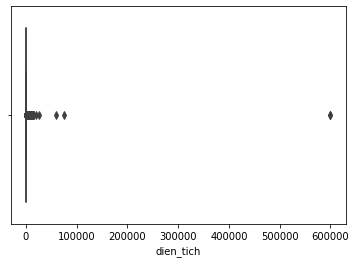

In [ ]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
sns.boxplot(x=rsht_data_new['dien_tich'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


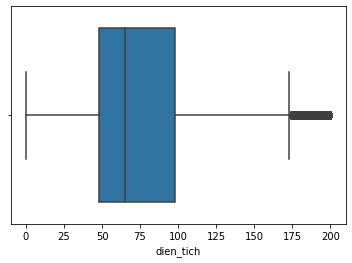

In [ ]:
rsht_data_new = outliner_remove(rsht_data_new, 'dien_tich')
rsht_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=rsht_data_new['dien_tich'])

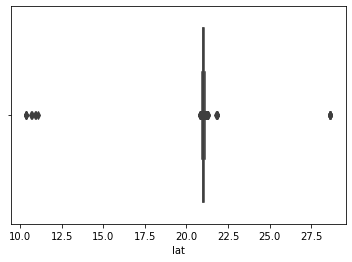

In [ ]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
sns.boxplot(x=rsht_data_new['lat'])

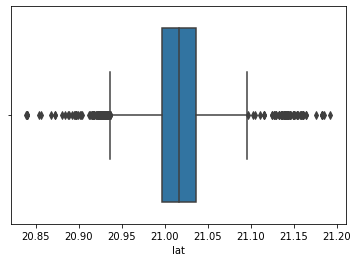

In [ ]:
rsht_data_new = rsht_data_new[rsht_data_new['lat'] >15]
rsht_data_new = rsht_data_new[rsht_data_new['lat'] <21.2]
rsht_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=rsht_data_new['lat'])

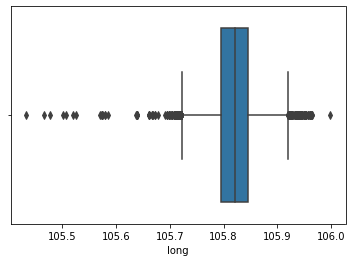

In [ ]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
sns.boxplot(x=rsht_data_new['long'])

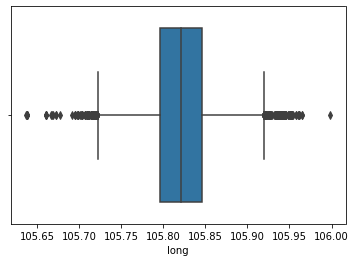

In [ ]:
rsht_data_new = rsht_data_new[rsht_data_new['long'] >105.6]
rsht_data_new = rsht_data_new[rsht_data_new['long'] <106]
rsht_data_new.reset_index(drop=True, inplace=True)
sns.boxplot(x=rsht_data_new['long'])

In [ ]:
rsht_data_new['the_loai'] = 'Road'

In [ ]:
rsht_data_new

dien_tich  phong_ngu  so_tang  so_do        lat        long  \
0           69.0        9.0      7.0     c√≥  21.027277  105.815289   
1           50.0        1.0      5.0  kh√¥ng  21.032735  105.830108   
2           72.0        5.0      5.0     c√≥  21.034090  105.806928   
3           50.0        3.0      5.0  kh√¥ng  20.955835  105.756366   
4           50.0        3.0      5.0  kh√¥ng  21.034188  105.833891   
...          ...        ...      ...    ...        ...         ...   
55371       80.0        3.0      3.0     c√≥  21.018166  105.847905   
55372       80.0        3.0      3.0     c√≥  21.018166  105.847905   
55373       80.0        3.0      3.0     c√≥  21.149180  105.758726   
55374       70.0        1.0      1.0     c√≥  21.164764  105.744397   
55375       70.0        2.0      1.0     c√≥  21.164764  105.744397   

            ten_quan huong_nha      gia the_loai  
0       Qu·∫≠n Ba ƒê√¨nh  ƒê√¥ng nam  21000.0     Road  
1       Qu·∫≠n Ba ƒê√¨nh       KXƒê  25000.0     Road  
2       Qu·∫≠n Ba ƒê√¨nh       KXƒê  12000.0     Road  
3       Qu·∫≠n Ba ƒê√¨nh       KXƒê  16000.0     Road  
4       Qu·∫≠n Ba ƒê√¨nh       KXƒê  16000.0     Road  
...              ...       ...      ...      ...  
55371  Huy·ªán M√™ Linh       KXƒê   4500.0     Road  
55372  Huy·ªán M√™ Linh       KXƒê   4500.0     Road  
55373  Huy·ªán M√™ Linh       KXƒê   4950.0     Road  
55374  Huy·ªán M√™ Linh       KXƒê   2400.0     Road  
55375  Huy·ªán M√™ Linh       KXƒê   4000.0     Road  

[55376 rows x 10 columns]

#T·ªïng h·ª£p

In [ ]:
data = pd.concat([at_data_new, lt_data_new, rsht_data_new])
mask = data['gia'].apply(lambda x: x.is_integer())
data['gia'] = data['gia'].astype(int)
data = data[mask]
data = data[data['gia'] >1000]

data.reset_index(drop=True, inplace=True)
data

dien_tich  phong_ngu  so_tang so_do        lat        long  \
0           75.0        2.0      1.0    c√≥  21.031035  105.815152   
1          115.0        3.0      1.0    c√≥  21.031130  105.814818   
2          100.0        2.0      1.0    c√≥  21.020889  105.815820   
3           30.0        2.0      2.0    c√≥  21.028785  105.821409   
4           72.0        2.0      3.0    c√≥  21.043654  105.841574   
...          ...        ...      ...   ...        ...         ...   
96570       80.0        3.0      3.0    c√≥  21.018166  105.847905   
96571       80.0        3.0      3.0    c√≥  21.018166  105.847905   
96572       80.0        3.0      3.0    c√≥  21.149180  105.758726   
96573       70.0        1.0      1.0    c√≥  21.164764  105.744397   
96574       70.0        2.0      1.0    c√≥  21.164764  105.744397   

            ten_quan huong_nha    gia   the_loai  
0       Qu·∫≠n Ba ƒê√¨nh       KXƒê   6300  Apartment  
1       Qu·∫≠n Ba ƒê√¨nh   T√¢y B·∫Øc  10250  Apartment  
2       Qu·∫≠n Ba ƒê√¨nh       Nam   2600  Apartment  
3       Qu·∫≠n Ba ƒê√¨nh       KXƒê   3500  Apartment  
4       Qu·∫≠n Ba ƒê√¨nh      ƒê√¥ng   1750  Apartment  
...              ...       ...    ...        ...  
96570  Huy·ªán M√™ Linh       KXƒê   4500       Road  
96571  Huy·ªán M√™ Linh       KXƒê   4500       Road  
96572  Huy·ªán M√™ Linh       KXƒê   4950       Road  
96573  Huy·ªán M√™ Linh       KXƒê   2400       Road  
96574  Huy·ªán M√™ Linh       KXƒê   4000       Road  

[96575 rows x 10 columns]

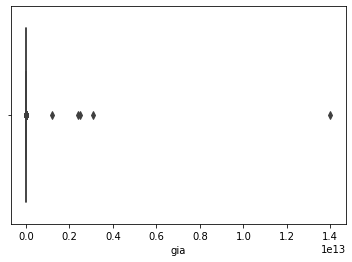

In [ ]:
#Ki·ªÉm tra v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai
plt.rcParams["figure.figsize"] = (6,4)
sns.boxplot(x=data['gia'])

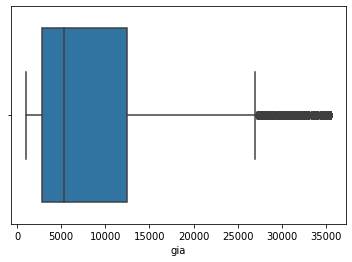

In [ ]:
data = outliner_remove(data, 'gia')
data.reset_index(drop=True, inplace=True)
sns.boxplot(x=data['gia'])

In [ ]:
dict_so_do = {
    "so_do":{
        "kh√¥ng":1.0,
        "c√≥":2.0
    }}

dict_the_loai = {
    "the_loai":{
        "Apartment":1.0,
        "Land":2.0,
        "Road":3.0
    }}

dict_ten_quan = dict(enumerate(data.ten_quan.unique()))
dict_ten_quan = {v: k for k, v in dict_ten_quan.items()}
dict_ten_quan = {
    'ten_quan': dict_ten_quan
}

dict_huong_nha = dict(enumerate(data.huong_nha.unique()))
dict_huong_nha = {v: k for k, v in dict_huong_nha.items()}
dict_huong_nha = {
    'huong_nha': dict_huong_nha
}

for i in [dict_so_do, dict_the_loai, dict_ten_quan, dict_huong_nha]:
    data.replace(i,inplace=True)

In [ ]:
data.so_do.unique()

array([2., 1.])

In [ ]:
data.the_loai.unique()

array([1., 2., 3.])

In [ ]:
data.ten_quan.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43])

In [ ]:
data.huong_nha.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
data

dien_tich  phong_ngu  so_tang  so_do        lat        long  ten_quan  \
0           75.0        2.0      1.0    2.0  21.031035  105.815152         0   
1          115.0        3.0      1.0    2.0  21.031130  105.814818         0   
2          100.0        2.0      1.0    2.0  21.020889  105.815820         0   
3           30.0        2.0      2.0    2.0  21.028785  105.821409         0   
4           72.0        2.0      3.0    2.0  21.043654  105.841574         0   
...          ...        ...      ...    ...        ...         ...       ...   
88077       80.0        3.0      3.0    2.0  21.018166  105.847905        42   
88078       80.0        3.0      3.0    2.0  21.018166  105.847905        42   
88079       80.0        3.0      3.0    2.0  21.149180  105.758726        42   
88080       70.0        1.0      1.0    2.0  21.164764  105.744397        42   
88081       70.0        2.0      1.0    2.0  21.164764  105.744397        42   

       huong_nha    gia  the_loai  
0              0   6300       1.0  
1              1  10250       1.0  
2              2   2600       1.0  
3              0   3500       1.0  
4              3   1750       1.0  
...          ...    ...       ...  
88077          0   4500       3.0  
88078          0   4500       3.0  
88079          0   4950       3.0  
88080          0   2400       3.0  
88081          0   4000       3.0  

[88082 rows x 10 columns]

In [ ]:
data

dien_tich  phong_ngu  so_tang  so_do        lat        long  ten_quan  \
0           75.0        2.0      1.0    2.0  21.031035  105.815152         0   
1          115.0        3.0      1.0    2.0  21.031130  105.814818         0   
2          100.0        2.0      1.0    2.0  21.020889  105.815820         0   
3           30.0        2.0      2.0    2.0  21.028785  105.821409         0   
4           72.0        2.0      3.0    2.0  21.043654  105.841574         0   
...          ...        ...      ...    ...        ...         ...       ...   
88077       80.0        3.0      3.0    2.0  21.018166  105.847905        42   
88078       80.0        3.0      3.0    2.0  21.018166  105.847905        42   
88079       80.0        3.0      3.0    2.0  21.149180  105.758726        42   
88080       70.0        1.0      1.0    2.0  21.164764  105.744397        42   
88081       70.0        2.0      1.0    2.0  21.164764  105.744397        42   

       huong_nha    gia  the_loai  
0              0   6300       1.0  
1              1  10250       1.0  
2              2   2600       1.0  
3              0   3500       1.0  
4              3   1750       1.0  
...          ...    ...       ...  
88077          0   4500       3.0  
88078          0   4500       3.0  
88079          0   4950       3.0  
88080          0   2400       3.0  
88081          0   4000       3.0  

[88082 rows x 10 columns]

#Train with LinearRegression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
names = ['dien_tich','phong_ngu','so_tang','so_do','lat','long','ten_quan','huong_nha','the_loai']
x = data[names]
y = data['gia']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
Linreg = LinearRegression().fit(x_train, y_train)
y_predict=Linreg.predict(x_test)
y_predict

array([15297.01052899, 12150.8331088 ,  9812.65342226, ...,
       10796.35729736,   349.18629106, 12811.18174897])

In [ ]:
y_test

0        18500
1        11000
2         6400
3         7000
4        22500
         ...  
17612     1400
17613    14800
17614    11800
17615     2700
17616    11000
Name: gia, Length: 17617, dtype: int64

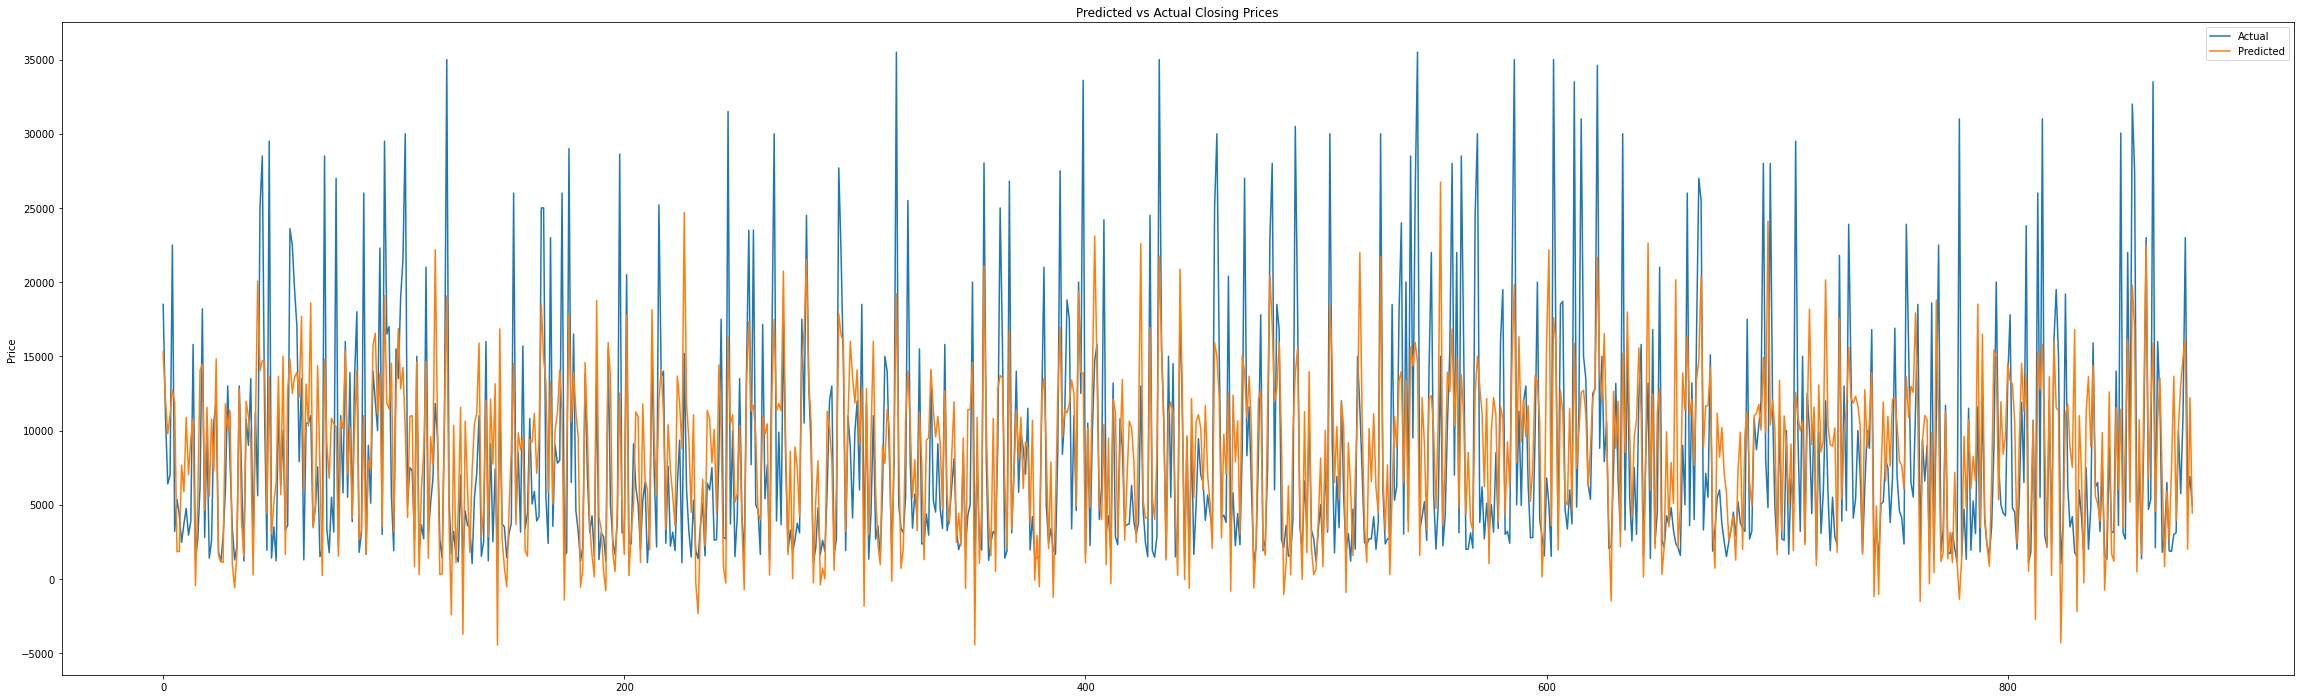

In [ ]:
fig = plt.figure() 
fig.set_size_inches(40, 12)
plt.plot(y_test, label='Actual')
plt.plot(y_predict.tolist(), label='Predicted')
plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score 
print ("r2 model: ", r2_score(y_test, y_predict))

r2 model:  0.4826999988646159


#Train with DNN

In [ ]:
from tensorflow import keras

model = keras.models.Sequential(name="DNN_model")

model.add(keras.layers.Dense(9, activation='relu', input_shape=(9,)))
model.add(keras.layers.Dense(9, activation='relu'))
model.add(keras.layers.Dense(1))

for i,layer in enumerate(model.layers):
  layer._name = 'layer_' + str(i)

model.summary()

Model: "DNN_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer_0 (Dense)             (None, 9)                 90        
                                                                 
 layer_1 (Dense)             (None, 9)                 90        
                                                                 
 layer_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 190
Trainable params: 190
Non-trainable params: 0
_________________________________________________________________


In [ ]:
opt = keras.optimizers.Adam(learning_rate = 1e-3, decay= 1e-6)

model.compile(loss='mean_squared_error', optimizer=opt, metrics=['accuracy'])
m = model.fit(x_train, y_train, epochs=30, validation_split=0.1)

Epoch 1/30
1982/1982 [==============================] - 6s 3ms/step - loss: 88865608.0000 - accuracy: 0.0000e+00 - val_loss: 60477840.0000 - val_accuracy: 0.0000e+00
Epoch 2/30
1982/1982 [==============================] - 6s 3ms/step - loss: 67962312.0000 - accuracy: 0.0000e+00 - val_loss: 59310304.0000 - val_accuracy: 0.0000e+00
Epoch 3/30
1982/1982 [==============================] - 6s 3ms/step - loss: 65283036.0000 - accuracy: 0.0000e+00 - val_loss: 58351144.0000 - val_accuracy: 0.0000e+00
Epoch 4/30
1982/1982 [==============================] - 6s 3ms/step - loss: 63396292.0000 - accuracy: 0.0000e+00 - val_loss: 57548940.0000 - val_accuracy: 0.0000e+00
Epoch 5/30
1982/1982 [==============================] - 6s 3ms/step - loss: 61677740.0000 - accuracy: 0.0000e+00 - val_loss: 56797048.0000 - val_accuracy: 0.0000e+00
Epoch 6/30
1982/1982 [==============================] - 6s 3ms/step - loss: 60217128.0000 - accuracy: 0.0000e+00 - val_loss: 56135648.0000 - val_accuracy: 0.0000e+00
Epoc

In [ ]:
y_predict= m.predict(x_test, batch_size=1)

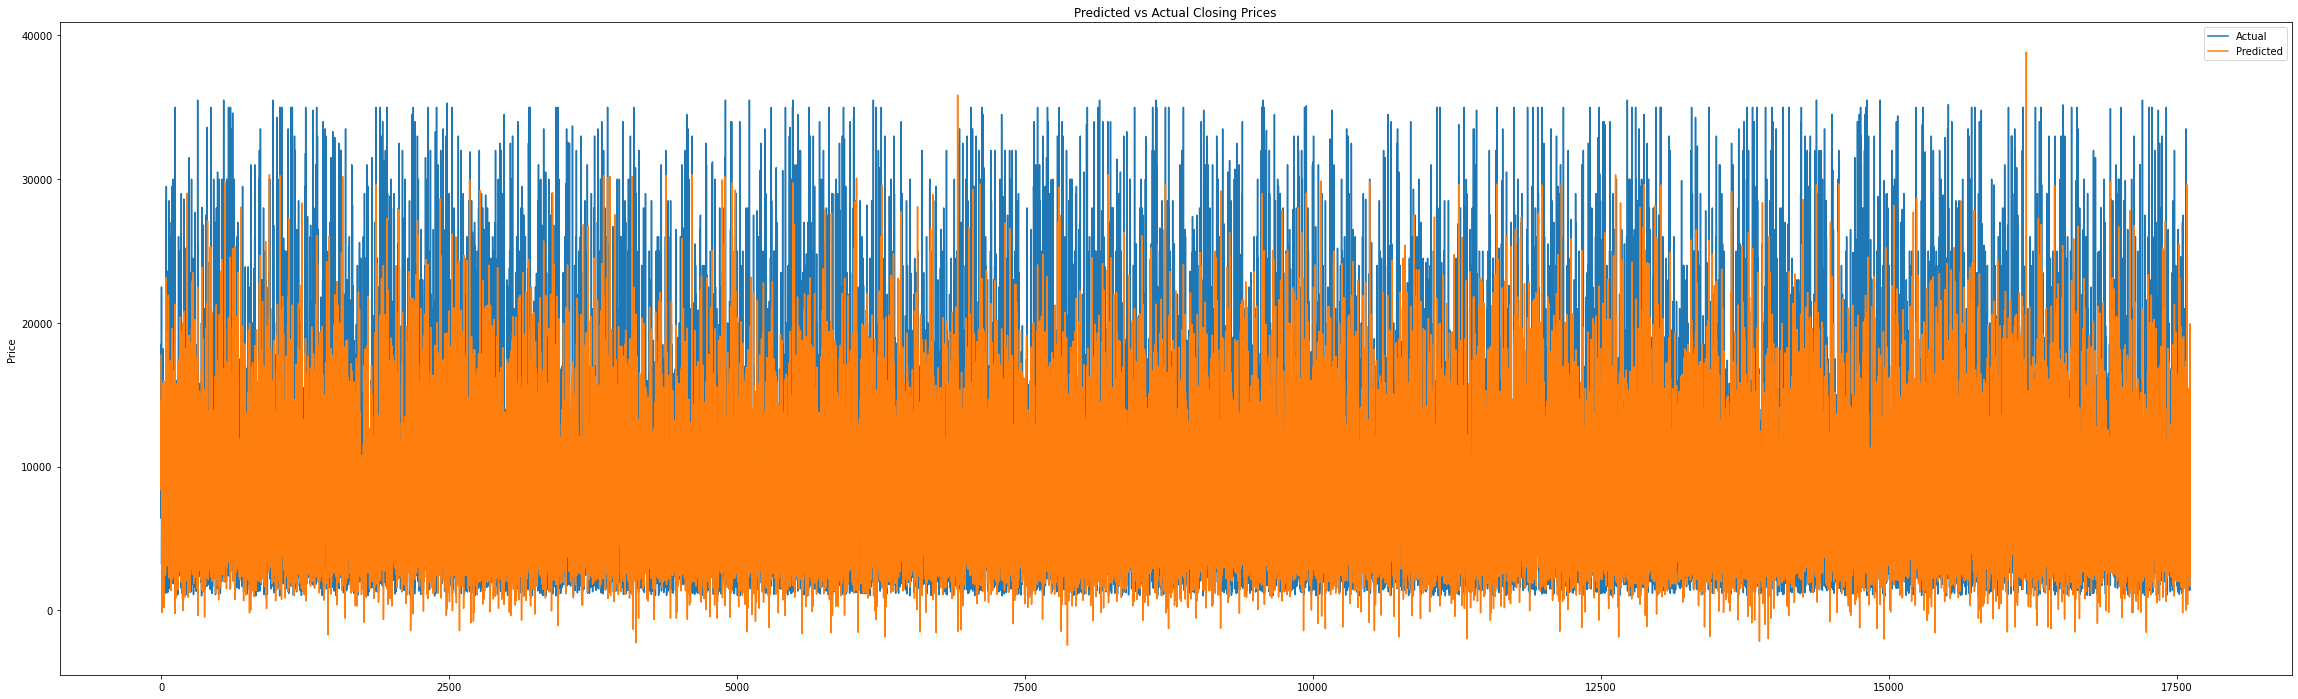

In [ ]:
fig = plt.figure() 
fig.set_size_inches(40, 12)
plt.plot(y_test, label='Actual')
plt.plot(y_predict.tolist(), label='Predicted')
plt.title(f"Predicted vs Actual Closing Prices")
plt.ylabel("Price")
plt.legend()
plt.show()